In [9]:
from mlxtend.plotting import plot_decision_regions
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
sns.set()
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [11]:
diabetes_data = pd.read_csv('diabetes.csv')
diabetes_data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [17]:
diabetes_data.info(verbose = True)
# Data structure examination.
# examining if data elements are missing or buggy.
# diabetes_data.fillna(diabetes_data.mean(), inplace=True)   code for filling in vaerage values for missing columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [19]:
diabetes_data.describe()
# basic analysis of given data(note that only numeral elements are covered in this code)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [21]:
diabetes_data.describe().T
# transpose data to be more readible

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [23]:
diabetes_data＿copy = diabetes_data.copy(deep = True) # keep original data untouched
cols = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
diabetes_data＿copy[cols] = diabetes_data＿copy[cols].replace(0, np.NaN)
print(diabetes_data＿copy.isnull().sum())
# replacing missing data with NaN value, making them easily manipulable 

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64


<Figure size 800x600 with 0 Axes>

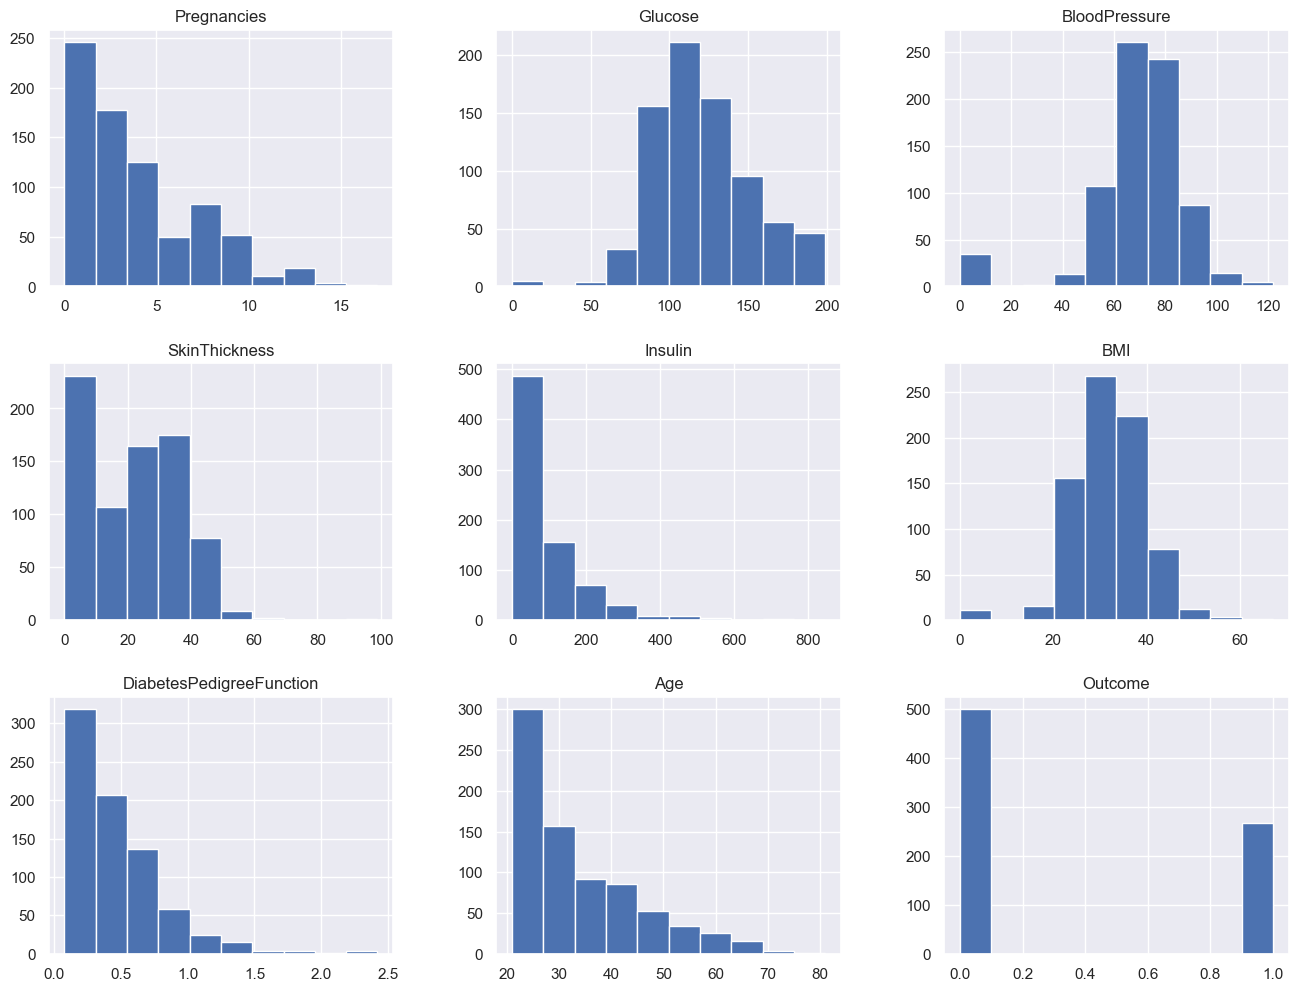

In [25]:
overview = diabetes_data.hist(figsize = (16,12))
plt.show()
# examining data in charts, makeing it easier to evaluate the method to replace NaN data 

In [26]:
cols_mean = ['Glucose', 'BloodPressure', 'BMI']
for col in cols_mean:
    mean = diabetes_data_copy[col].mean()
    diabetes_data_copy[col].fillna(mean, inplace = True)

cols_median = ['SkinThickness', 'Insulin']
for col in cols_median:
    median = diabetes_data_copy[col].median()
    diabetes_data_copy[col].fillna(median, inplace = True)

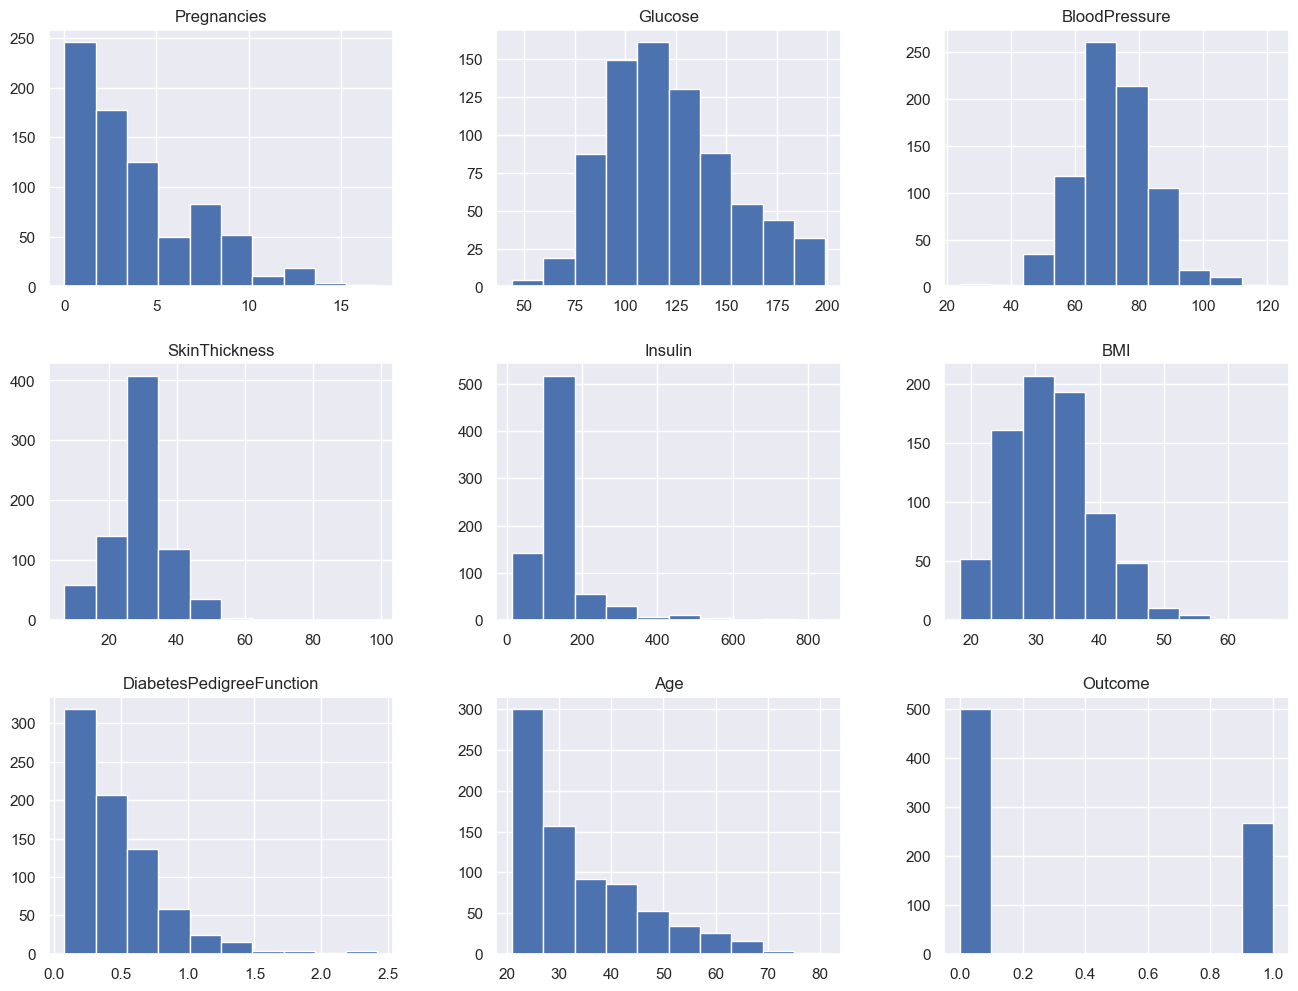

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


In [29]:
overview = diabetes_data_copy.hist(figsize = (16,12))
plt.show()
print(diabetes_data_copy.isnull().sum())

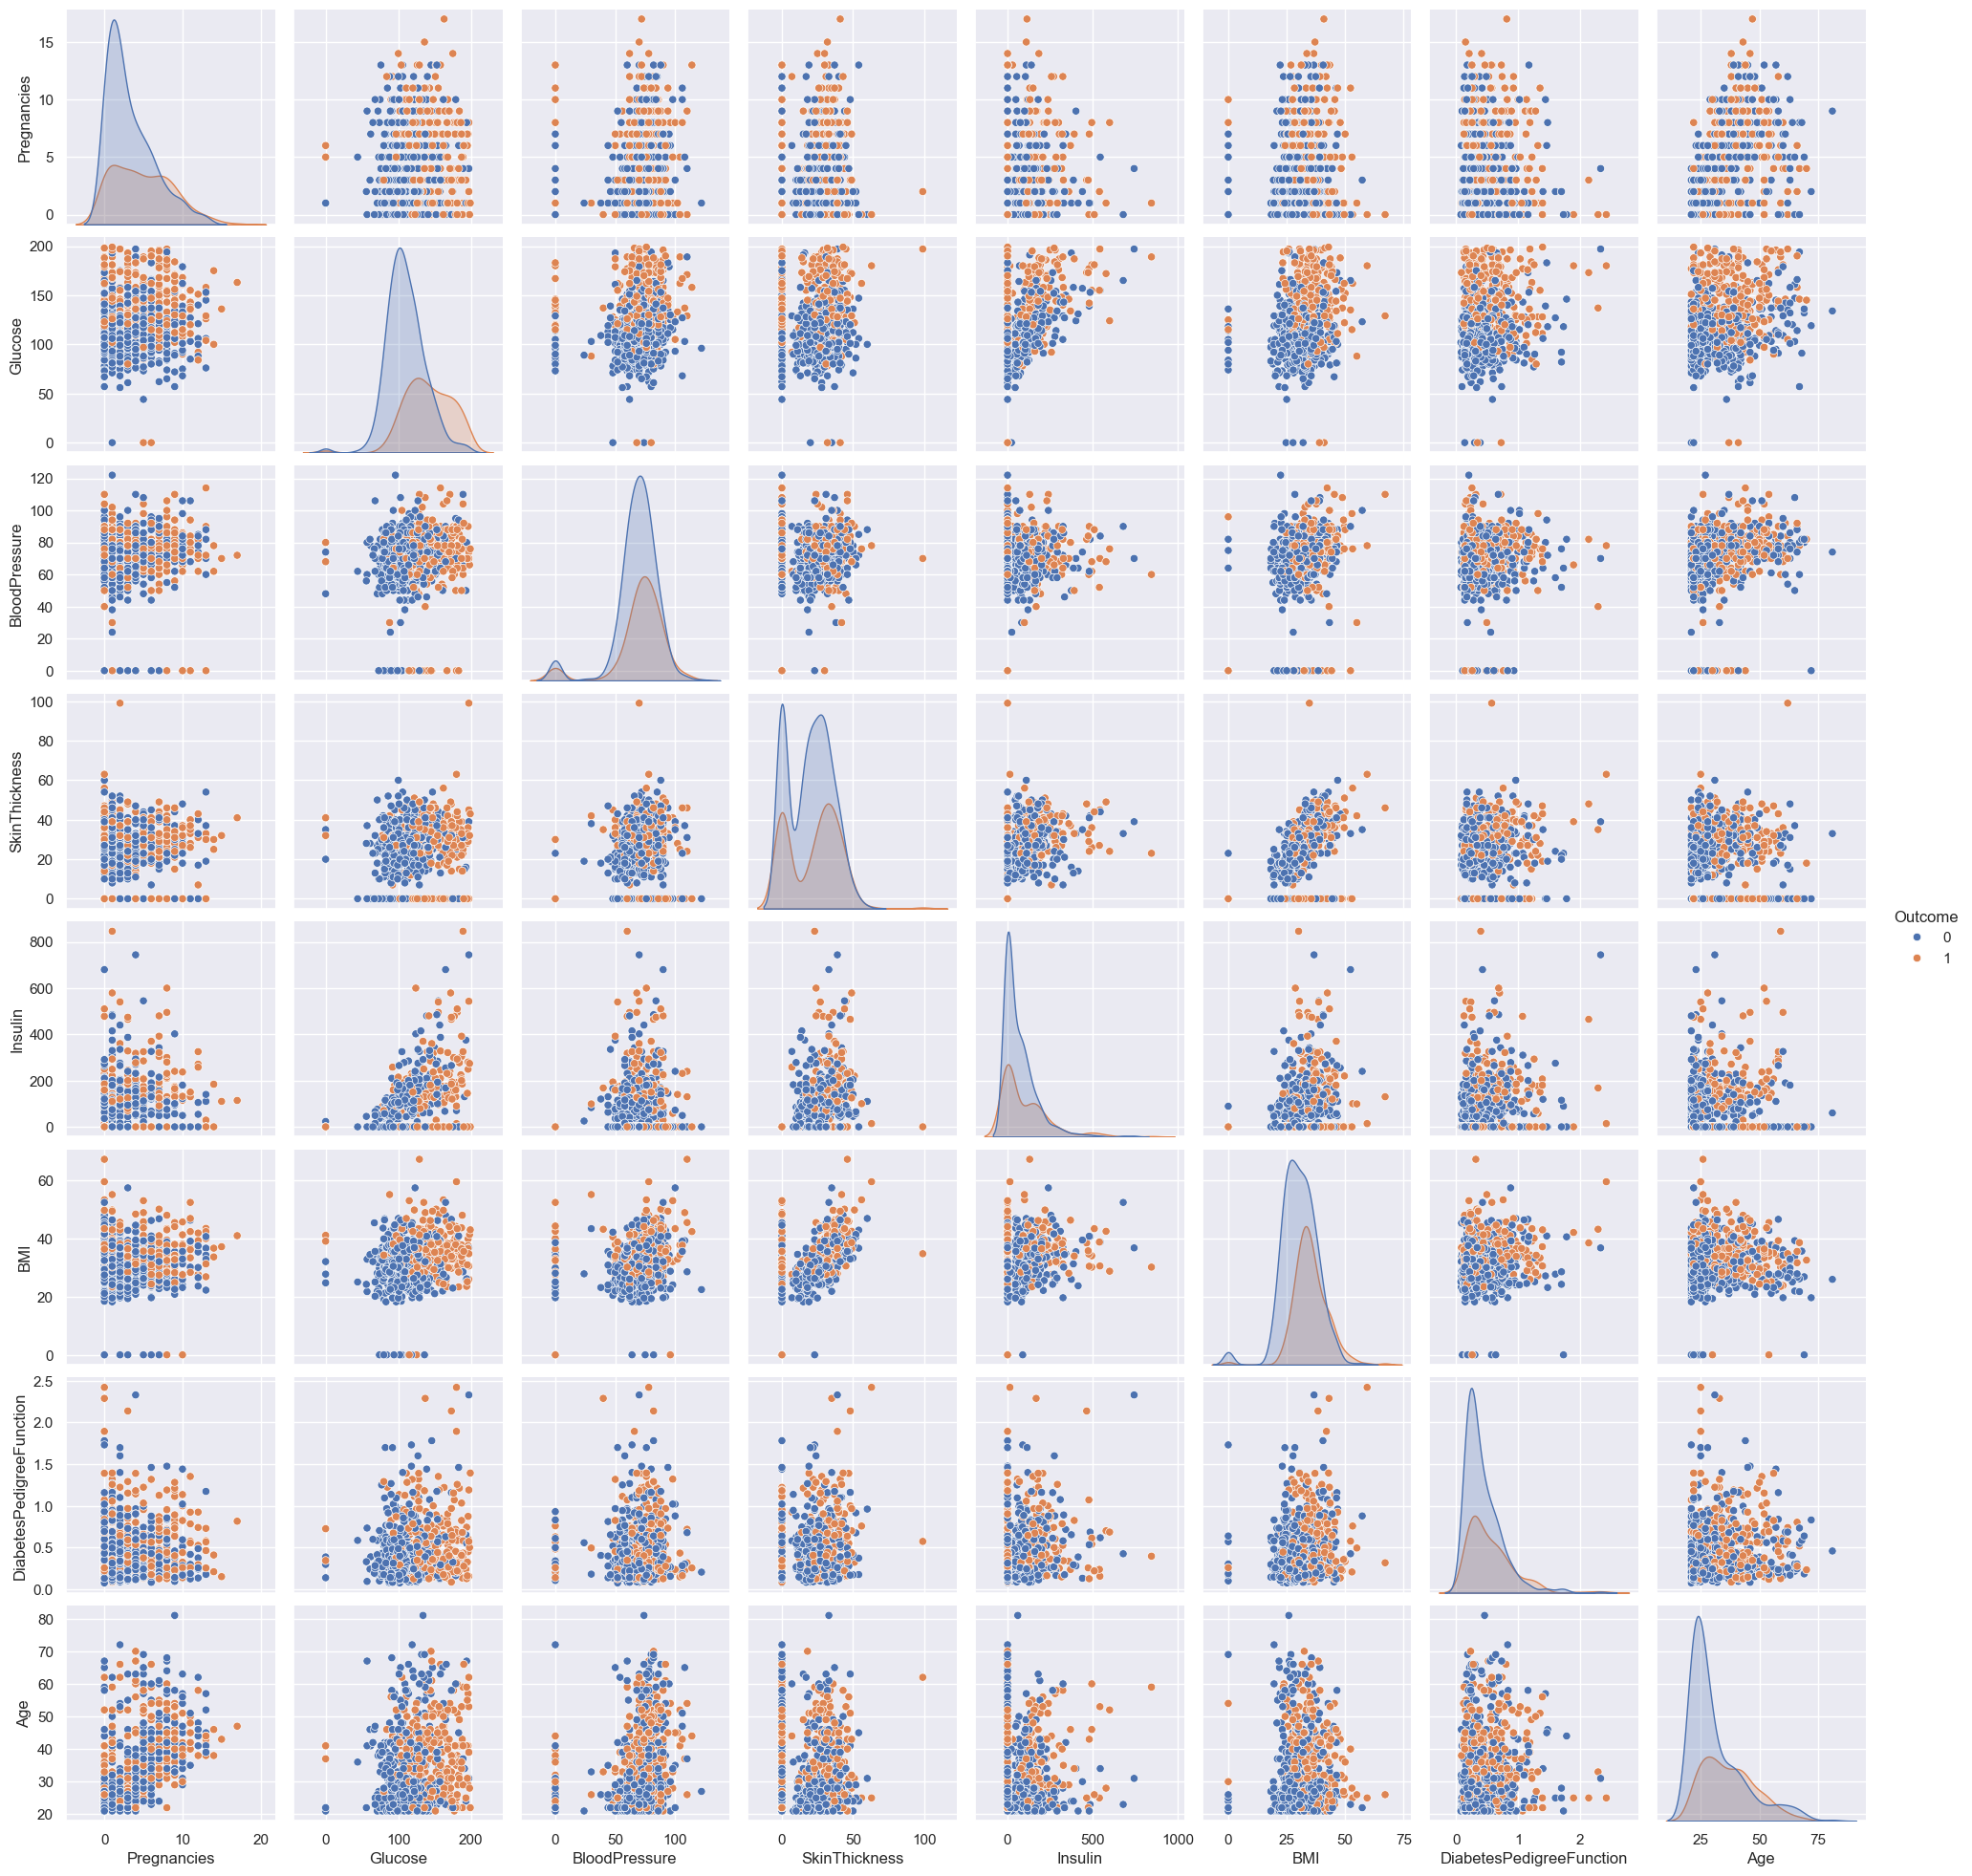

In [31]:
from pandas.plotting import scatter_matrix
sns.pairplot(diabetes_data, diag_kind='kde', hue = 'Outcome')
plt.show()
# initial evaluation by visualizing probability distribution between Outcome "1" and "0"

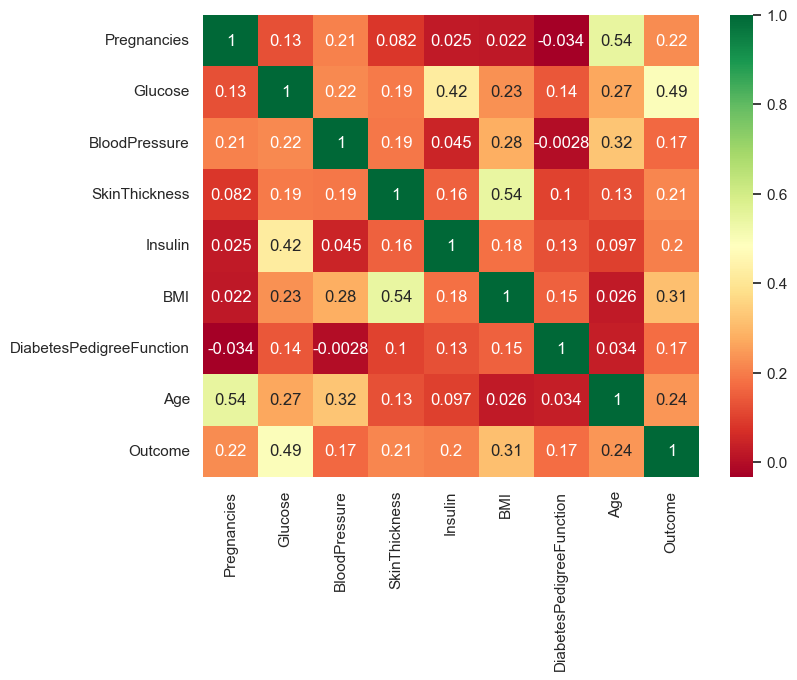

In [32]:
plt.figure(figsize=(8,6))
p=sns.heatmap(diabetes_data_copy.corr(), annot=True,cmap ='RdYlGn') 
plt.show()
# initial evaluation by visualizing correlation among different factors

In [81]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data_without_Outcome = diabetes_data_copy.drop(['Outcome'], axis=1)#axis_0 = row, axis_1 = column
scaled_array = scaler.fit_transform(data_without_Outcome) 
scaled_data = pd.DataFrame(scaled_array, columns = ['Pregnancies', 'Glucose', 'BloodPressure',\
'SkinThickness', 'Insulin','BMI', 'DiabetesPedigreeFunction', 'Age'])
#Standardization, data is rescaled in the way that μ(ave) = 0 and 𝛔(stdev) = 1

In [83]:
scaled_data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.639947,0.865108,-0.033518,0.670643,-0.181541,0.166292,0.468492,1.425995
1,-0.844885,-1.206162,-0.529859,-0.012301,-0.181541,-0.852531,-0.365061,-0.190672
2,1.233880,2.015813,-0.695306,-0.012301,-0.181541,-1.332833,0.604397,-0.105584
3,-0.844885,-1.074652,-0.529859,-0.695245,-0.540642,-0.634212,-0.920763,-1.041549
4,-1.141852,0.503458,-2.680669,0.670643,0.316566,1.548980,5.484909,-0.020496


In [97]:
from sklearn.model_selection import train_test_split
x = scaled_data #features under standardization
y = diabetes_data_copy["Outcome"] #labels (original)
X_train, X_test, y_train, y_test = train_test_split(
    x, y,  
    test_size = 0.2, # 20% test set for model accuracy
    random_state = 42, #random split
    stratify = y # based off "y"
)
# "stratify parameter" creates split for data so that the proportion of values remain the same for produced/provided data 
# this method prevents deviation from imbalanced scattering of data

In [105]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, y_train)
y_predicted = model.predict(X_test)
# logistic regression model for training

In [121]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
print("Accuracy:", accuracy_score(y_test, y_predicted))
print("\n")
print("Confusion Matrix:\n", confusion_matrix(y_test, y_predicted))
print("\n")
print("Classification Report:\n", classification_report(y_test, y_predicted))

Accuracy: 0.7077922077922078


Confusion Matrix:
 [[82 18]
 [27 27]]


Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.82      0.78       100
           1       0.60      0.50      0.55        54

    accuracy                           0.71       154
   macro avg       0.68      0.66      0.67       154
weighted avg       0.70      0.71      0.70       154



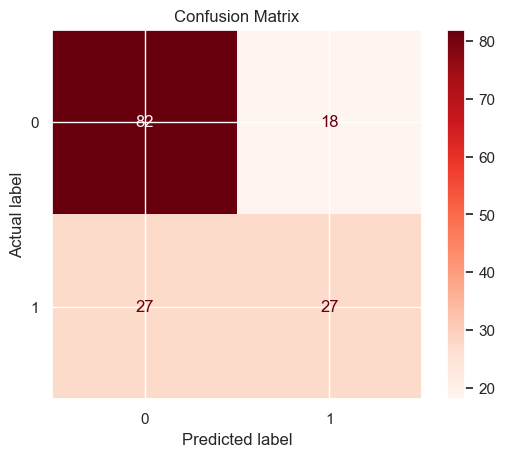

In [127]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(model, X_test, y_test, cmap="Reds")
plt.title("Confusion Matrix")
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()